<a href="https://colab.research.google.com/github/csantanaes/analisedadostwitter/blob/main/EARTE_Analise_Twitter_jun_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Projeto Analise de dados Twitter hastag #earte - Ensino remoto emergencial UFES - Pandemia**

**Montagem do Drive **

In [ ]:
#montagem do Drive no Colab 
from google.colab import drive
import datetime 
drive.mount('/content/drive')
tempo = datetime.datetime.now()
print('Drive montado  ', tempo)

Mounted at /content/drive
Drive montado   2021-06-17 16:45:03.579838


In [ ]:
# IMPORTANDO CSV para Colab 
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DATA/tweets_EARTE_hydrated.csv')
df.head()
# 

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False


# 2.0 - Coletando informações sobre o dataframe importado

In [ ]:

type(df)

pandas.core.frame.DataFrame

In [ ]:
#informações e campos do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4998 non-null   int64  
 1   tweet_url                     4998 non-null   object 
 2   created_at                    4998 non-null   object 
 3   parsed_created_at             4998 non-null   object 
 4   user_screen_name              4998 non-null   object 
 5   text                          4998 non-null   object 
 6   tweet_type                    4998 non-null   object 
 7   coordinates                   0 non-null      float64
 8   hashtags                      536 non-null    object 
 9   media                         385 non-null    object 
 10  urls                          290 non-null    object 
 11  favorite_count                4998 non-null   int64  
 12  in_reply_to_screen_name       1255 non-null   object 
 13  in_

In [ ]:
# number of rows - number of duplicates:
df.shape[0] - df['user_id'].duplicated().sum()

1930

In [ ]:
print('Number of colums in Dataframe : ', len(df.columns))
print('Number of rows in Dataframe : ', len(df.index))

Number of colums in Dataframe :  37
Number of rows in Dataframe :  4998


In [ ]:
#mostrar todas linhas do dataframe
import pandas 
pandas.set_option('display.max_rows', df.shape[0]+1)
print(df)

                       id  ... user_verified
0     1348123015066775554  ...         False
1     1348125535495340033  ...         False
2     1348145276914200576  ...         False
3     1348184655237844992  ...         False
4     1348187077905563649  ...         False
5     1348201254250373120  ...         False
6     1348203661545988096  ...         False
7     1348210283433447424  ...         False
8     1348210976194064385  ...         False
9     1348212020185681921  ...         False
10    1348227190656098307  ...         False
11    1348228133728579590  ...         False
12    1348230313307115520  ...         False
13    1348234103393460227  ...         False
14    1348236527294316548  ...         False
15    1348273436280320001  ...         False
16    1348274174062514183  ...         False
17    1348300236133814273  ...         False
18    1348301112646909954  ...         False
19    1348323234404556801  ...         False
20    1348324565001363462  ...         False
21    1348

In [ ]:
# Drop irrelevant columns
df = df.drop(df.columns[[13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]], axis=1)

In [ ]:
df['user_screen_name'].value_counts().head(10)

hnk5uoe          91
b2Gr8            89
6U0w0U9          72
tkns_0325        56
____stk1022      49
na__ko__3        28
MagiasUFES       24
arashi_091510    22
yomogimoRi       21
OTAKA96438403    20
Name: user_screen_name, dtype: int64

In [ ]:
df['user_screen_name'].value_counts().cumsum().head(10)

# https://www.kaggle.com/eliasdabbas/twitter-in-a-dataframe 

hnk5uoe           91
b2Gr8            180
6U0w0U9          252
tkns_0325        308
____stk1022      357
na__ko__3        385
MagiasUFES       409
arashi_091510    431
yomogimoRi       452
matheusschwan    472
Name: user_screen_name, dtype: int64

In [ ]:
# pesquisa regex = count 
df.filter(regex='count', axis=1).head() # user ID and tweet ID are integers but not 'numeric' in this sense

,favorite_count,retweet_count,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
0,1,0,107653,710,488,7,118678
1,1,0,107653,710,488,7,118678
2,0,0,10924,2019,1992,18,30606
3,0,0,35614,85,101,4,9372
4,0,0,35614,85,101,4,9372


In [ ]:
print('Boolean columns: ')
python_bool = df.select_dtypes(bool)
python_bool.head()

Boolean columns: 


,user_default_profile_image,user_verified
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [ ]:
(python_bool
 .mean()
 .to_frame().T
 .rename(axis=0, mapper={0: 'mean:'})
 .style.format("{:.2%}"))

,user_default_profile_image,user_verified
mean:,0.04%,0.18%


In [ ]:
df.head()

df['id'].duplicated().sum()

0

In [ ]:
#How many people don't have a description?
df['user_description'].isna().sum()

381

# 2.1 ww


In [ ]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

KeyError: ignored

# 3.0 - Processo de limpeza do dataset


In [ ]:

# Regular Expression Python module
import re
import pandas as pd
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [ ]:
df['text_new'] = df['text'].apply(cleanUpTweet)

# aqui deveria entrar uma opção de salvar o CSV com o novo campo

In [ ]:
#Filtrar dataframe 2 colunas

df[['text', 'text_new']]

,text,text_new
0,@Tea_earte てぃさんおはようございますっ😆✨,てぃさんおはようございますっ😆✨
1,@Tea_earte てぃさぁぁあんんんん！！！！！,てぃさぁぁあんんんん！！！！！
2,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃
...,...,...
4993,Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh,Eu no EARTE kkkkkkkk
4994,earte me fazendo passar raiva em pleno sábado,earte me fazendo passar raiva em pleno sábado
4995,@Lugusfe SIM! as atividades do earte que aguar...,SIM! as atividades do earte que aguardem eu t...
4996,em completo desespero e desânimo com com earte,em completo desespero e desânimo com com earte


In [ ]:
import plotly.express as plt
#plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in df['hashtag']
        [x[1] for x in df['hashtag'])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

SyntaxError: ignored

In [ ]:
import plotly as plt 
data = data([Bar(x=df["hashtag"], y=df["text"])])

plt.image.ishow({'data': data})

NameError: ignored

#limpeza hastagh

In [ ]:
import re
df['hashtag'] = df['text'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x)) #creating a new column

In [ ]:
df[['text', 'hashtag']]

,text,hashtag
0,@Tea_earte てぃさんおはようございますっ😆✨,[]
1,@Tea_earte てぃさぁぁあんんんん！！！！！,[]
2,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,[]
3,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,[]
4,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,[]
...,...,...
4993,Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh,[]
4994,earte me fazendo passar raiva em pleno sábado,[]
4995,@Lugusfe SIM! as atividades do earte que aguar...,[]
4996,em completo desespero e desânimo com com earte,[]


In [ ]:
1 - x 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12499 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12362 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

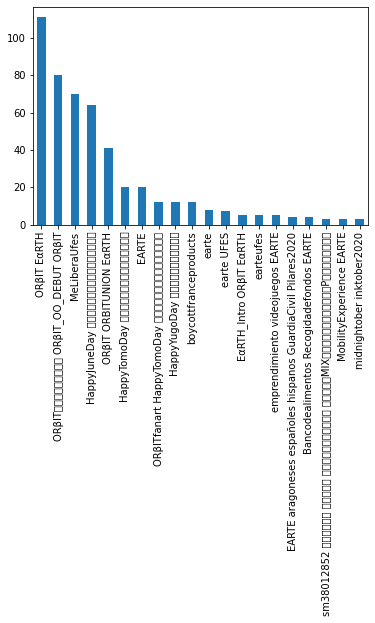

In [ ]:
# Gráfico de hastags 
from matplotlib import font_manager as fm, rcParams
import matplotlib as plt
plt.rcParams["font.serif"] = "cmr10"
plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually
df['hashtags'].value_counts()[:20].plot(kind='bar')

In [ ]:
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_new,hashtag
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさんおはようございますっ😆✨,[]
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさぁぁあんんんん！！！！！,[]
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,[]
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,[]
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃,[]


In [ ]:
df1 = df.text.str.extractall(r'(\#\w+)')[0].value_counts()

In [ ]:
import pandas as pd
dfhashtags = df1.to_frame()


In [ ]:
type(df1)

pandas.core.series.Series

In [ ]:


type(dfhashtags)

pandas.core.frame.DataFrame

In [ ]:
dfhashtags.head()

NameError: ignored

In [ ]:
dfhashtags.info()



<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, #ORβIT to #jury
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       77 non-null     int64
dtypes: int64(1)
memory usage: 3.7+ KB


In [ ]:
#visao sobre hastags do dataframe
hashtag_summary['overview']

{'hashtags_per_post': 0.22589035614245698,
 'num_hashtags': 1129,
 'num_posts': 4998,
 'unique_hashtags': 72}

# 1.x Gráfico de hastags 

In [ ]:
# CONTAGEM Hashtags do dataset
#df.text.str.extractall(r'(\#\w+)')[0].value_counts()
df['first_five_Letter'] = df.text.str.extractall(r'(\#\w+)')[0].value_counts()

In [ ]:
df.first_five_Letter

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4993   NaN
4994   NaN
4995   NaN
4996   NaN
4997   NaN
Name: first_five_Letter, Length: 4998, dtype: float64

In [ ]:
# Querying hashtags from database
#data_tags = DbConnect("SELECT Tweet_Id, Hashtag FROM TwitterEntity;")

df_tags = pd.DataFrame(columns=['Tweet_Id','Hashtags'])

for data in df_tags:
    index = len(df_tags)
    df_tags.loc[index,'Tweet_Id'] = data[0]
    df_tags.loc[index,'Hashtags'] = data[1]
    
df_tags.head(20)

,Tweet_Id,Hashtags
0,T,w
1,H,a


In [ ]:
import plotly as plt
import matplotlib.pyplot as plt


#plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

NameError: ignored

In [ ]:
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_new,hashtag
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066775554,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさんおはようございますっ😆✨,[]
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495340033,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさぁぁあんんんん！！！！！,[]
2,1348145276914200576,https://twitter.com/jktaejoon/status/1348145276914200576,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURANS7D DU F https://t.co/HXvDu9tIY4,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURANS7D DU F,[]
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184655237844992,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,[]
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187077905563649,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃,[]


In [ ]:
pd.set_option('display.max_columns', None)
print(df)

                       id  \
0     1348123015066775554   
1     1348125535495340033   
2     1348145276914200576   
3     1348184655237844992   
4     1348187077905563649   
...                   ...   
4993  1315506913627561985   
4994  1315074239360389121   
4995  1314955335296221184   
4996  1316051961146478592   
4997  1315812199684808704   

                                                        tweet_url  \
0            https://twitter.com/b2Gr8/status/1348123015066775554   
1            https://twitter.com/b2Gr8/status/1348125535495340033   
2        https://twitter.com/jktaejoon/status/1348145276914200576   
3      https://twitter.com/____stk1022/status/1348184655237844992   
4      https://twitter.com/____stk1022/status/1348187077905563649   
...                                                           ...   
4993   https://twitter.com/NandaSibien/status/1315506913627561985   
4994    https://twitter.com/liviajaisa/status/1315074239360389121   
4995  https://twitter.com/jens

ss

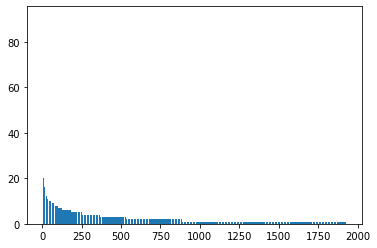

20


In [ ]:
import matplotlib.pyplot as plt

counts = df["user_screen_name"].value_counts()
plt.bar(range(len(counts)),counts)
plt.show()
print(counts[10])

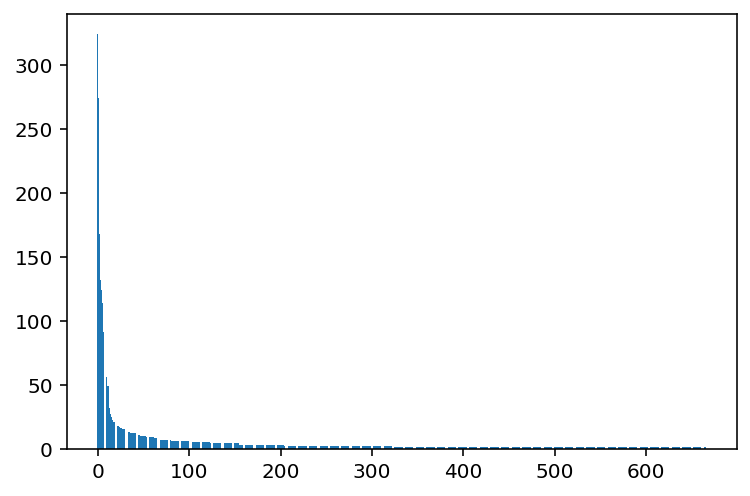

Vitória, Brasil                   324
Espírito Santo, Brasil            274
027                               168
Alegre, Brasil                    132
Vila Velha, Brasil                124
                                 ... 
Espírito Santo, Brasil.             1
🇷🇺; she/her; bisexual; infj.        1
Trolas || TeamFockingAndroid ♡      1
Pé de amora                         1
Brasil - Espirito Santo             1
Name: user_location, Length: 666, dtype: int64


In [ ]:
counts = df["user_location"].value_counts()
plt.bar(range(len(counts)),counts)
plt.show()
print(counts)

In [ ]:
df

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1315506913627561985,https://twitter.com/NandaSibien/status/1315506...,Mon Oct 12 04:17:43 +0000 2020,2020-10-12 04:17:43+00:00,NandaSibien,Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh,quote,NaN,NaN,NaN,https://twitter.com/oocbrazil/status/131532126...,1,NaN,NaN,NaN,pt,NaN,False,0,1.315321e+18,oocbrazil,1.195388e+18,"<a href=""http://twitter.com/download/android"" ...",1094745373569138688,Sun Feb 10 23:50:11 +0000 2019,False,18 years old \r\nCaloura enfermagem UFES São M...,1200,131,152,0,NaN,Nanda Sibien💜,1729,NaN,NaN,False
4994,1315074239360389121,https://twitter.com/liviajaisa/status/13150742...,Sat Oct 10 23:38:26 +0000 2020,2020-10-10 23:38:26+00:00,liviajaisa,earte me fazendo passar raiva em pleno sábado,original,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,pt,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",213735476,Tue Nov 09 17:26:09 +0000 2010,False,"“we all die, the question is what we stood for...",370,465,59,29,NaN,hermosa,19033,NaN,NaN,False
4995,1314955335296221184,https://twitter.com/jenstiltskin/status/131495...,Sat Oct 10 15:45:57 +0000 2020,2020-10-10 15:

In [ ]:
df.info
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#Which user is most active on twitter
count=df['user_screen_name'].value_counts()
df_count=pd.DataFrame()
df_count['user_screen_name'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:50,:]
drawbarplot(x=df_count.activeCount,y=df_count.Username,xlabel='count',title='Top 50 active user in given time span',figsize=(16,16))

NameError: ignored

In [ ]:

#df.info()

#Favoritos top 10 tweets
top_ten_tweets = df['favorite_count'].sort_values(ascending=False).head(10) # returns a df with first column = index, second column = tweet
top_ten_tweets

#print(id + "'s top 5 tweets (using favorite count)" + "\n")
#for i in range(5):
#    index = top_ten_tweets.index[i]
#    print(str(i+1) + ")" + df.iloc[index]['text'])
#    print("Favorite count: " + str(df.iloc[index]['favorite_count']) + "\n")

# retomar: https://4bic.github.io/2018-07-21-healthX_twitter_analysis/
#https://benalexkeen.com/resampling-time-series-data-with-pandas/
#https://medium.com/dataexplorations/thoughts-on-visionzero-first-steps-with-the-twitter-api-and-word2vec-for-text-analysis-e766ed6b55ab
#https://github.com/sergiers3/Mariano-Rajoy-Twitter-analysis-tutorial
#http://jurgens.people.si.umich.edu/tutorials/Mapping_Word_Frequencies_on_Twitter_using_Python.html


326     663
3545    663
4972    663
3790    663
4412    663
1447    663
3606    663
3735    663
3604    663
3755    663
Name: favorite_count, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12498 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12490 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12467 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12499 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.p

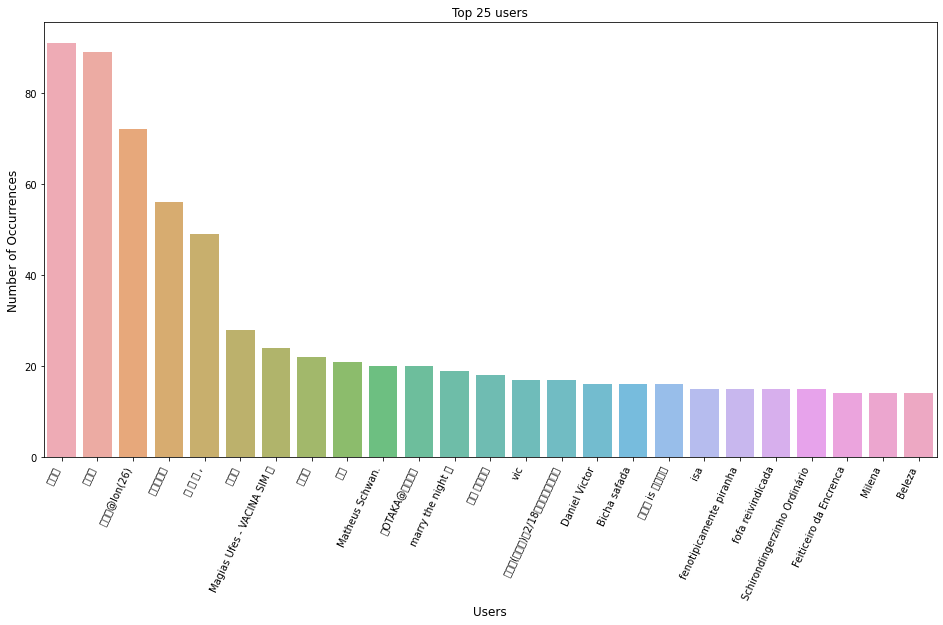

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
users_count  = df['user_name'].value_counts()
users_count = users_count[:25,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 25 users')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Users', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

#https://github.com/dariaminsky/belarusian-twitter/blob/master/EDA.ipynb

In [ ]:
#Contagem do Tuites mais antigo ao mais novo
print("Data twitter mais antigo:  ",df.created_at.min())
print("-----")
print("Data twitter mais novo  :  ",df.created_at.max())

#reactions = df.groupby(['created_at']).count()
#ax = reactions.replies.plot(figsize=(15,6),ls='--',c='red')
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

Data twitter mais antigo:   Fri Dec 04 00:06:15 +0000 2020
-----
Data twitter mais novo  :   Wed Oct 28 23:59:51 +0000 2020


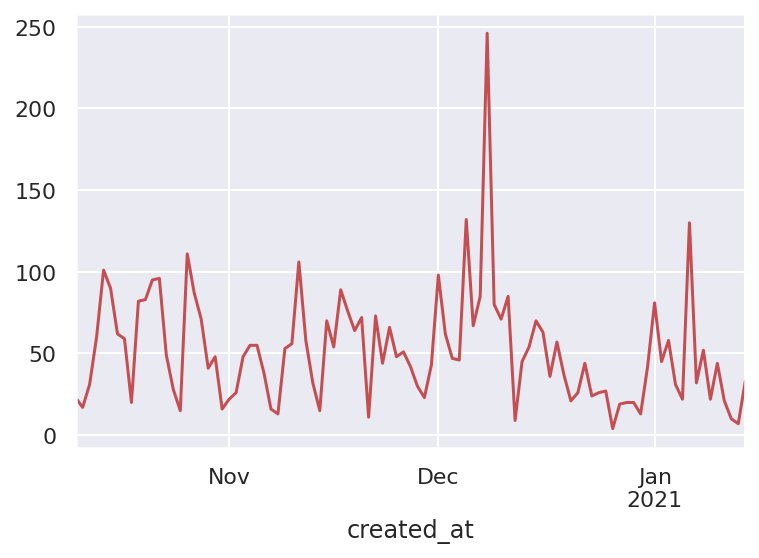

In [ ]:
# Gráfico de volume de postages
# Convert the created_at column to np.datetime object
df['created_at'] = pd.to_datetime(df['created_at'])

df.set_index('created_at').resample('D').text.count().plot(color='r')


#Analisar os dados.. Tentar fazer script para contar twuites agregados de um mes

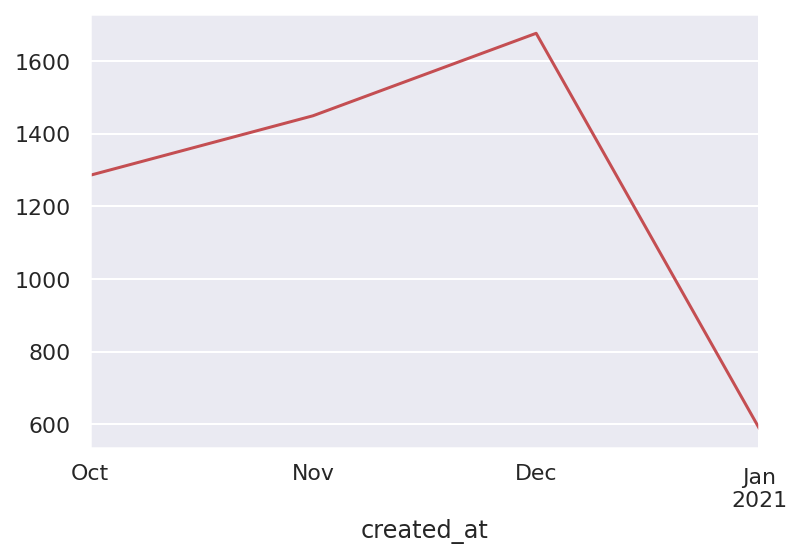

In [ ]:
df.set_index('created_at').resample('M').text.count().plot(color='r')

In [ ]:
#ANALISE ORIGEM POST

df['source'].head()
# first extracting the client name including the >< characters
for source in df['source']:
    df['source'] = df['source'].str.extract('(\>.*\<)', expand=False) #output example: '>Twitter for Android<'
    
# after that extracting only the letters
for source in df['source']:
    df['source'] = df['source'].str.extract('([a-zA-Z ]+)', expand=False) #output example: 'Twitter for Android'

# get the value counts for source column
df['source'].value_counts()



Twitter for Android    2539
Twitter for iPhone     1494
Twitter Web App         924
TweetDeck                10
Twitter for iPad          9
Arrow                     4
Cheap Bots                4
twitcle plus              2
AssistirBot               2
Guud Campaigns            2
CapivarBot                1
QuarentenaBot             1
Echofon                   1
Instagram                 1
Bot corno                 1
Poop retweet v            1
leo                       1
Name: source, dtype: int64

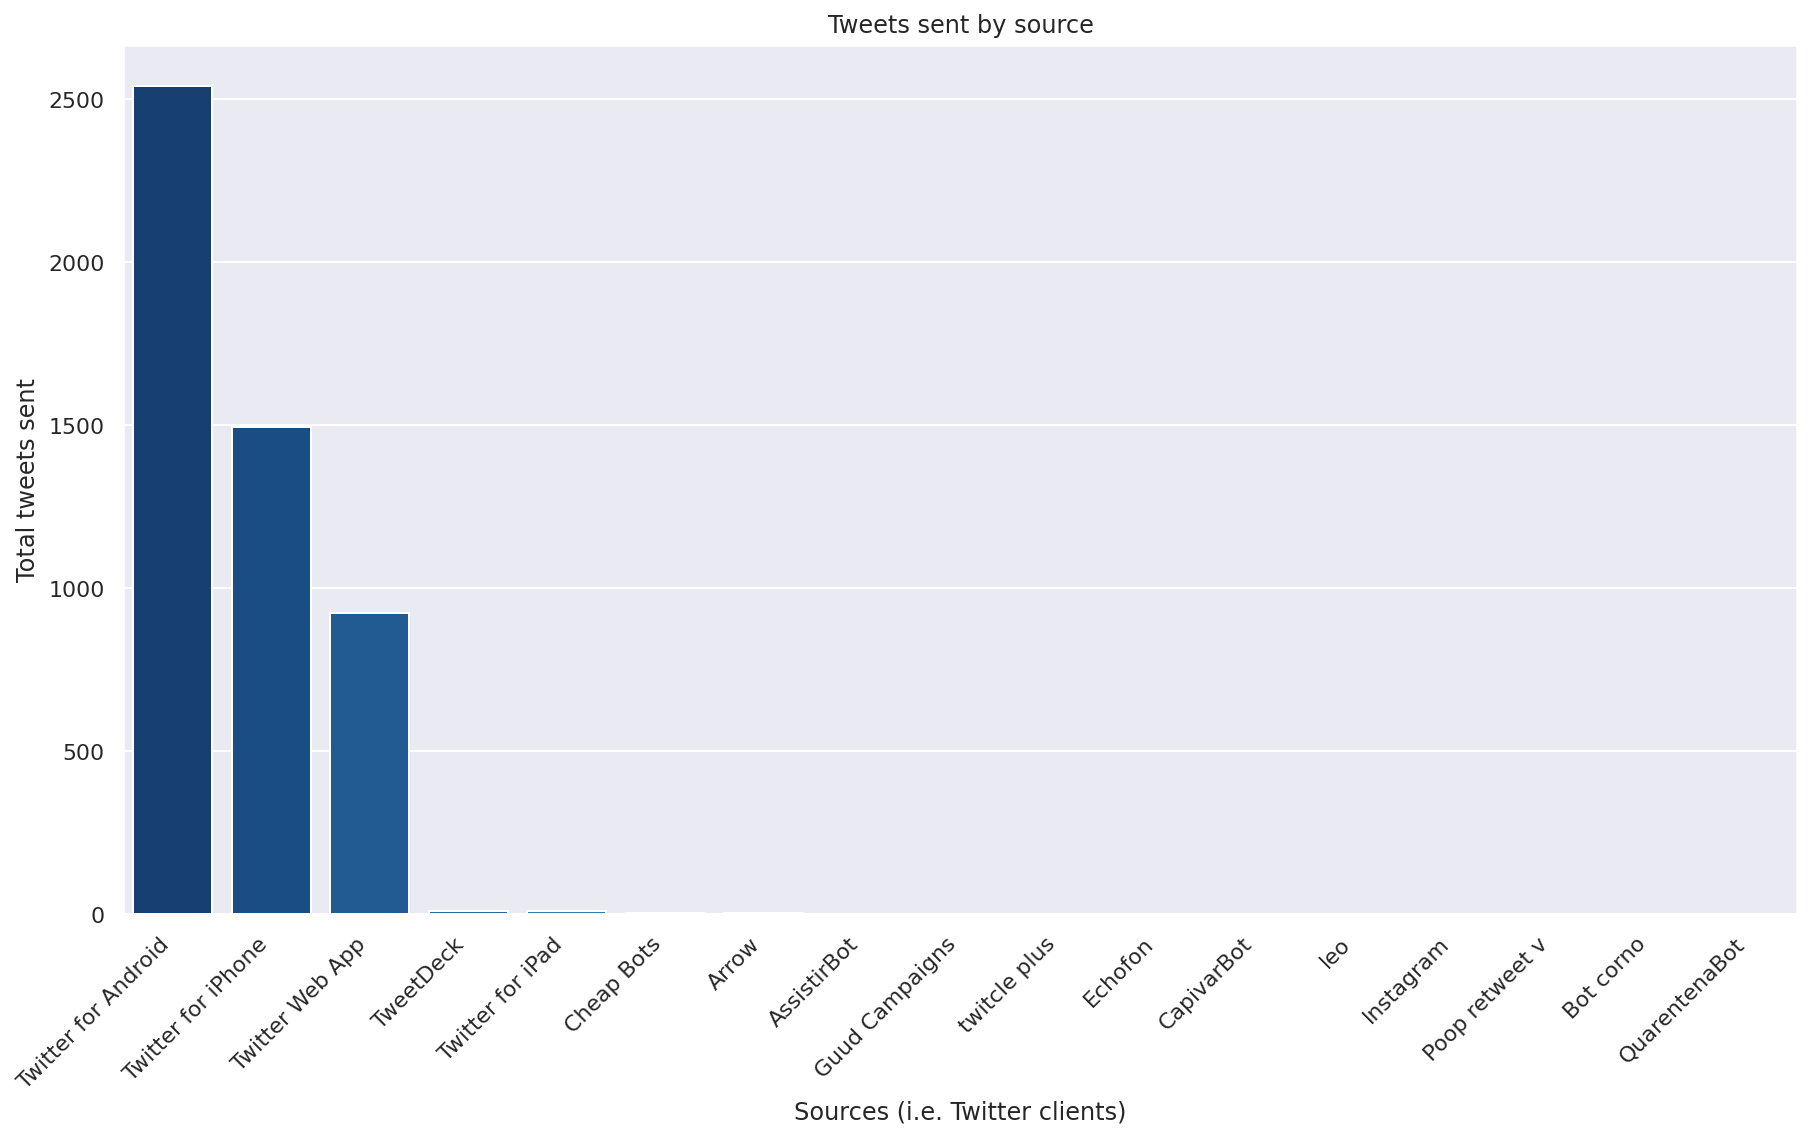

In [ ]:
#gráfico de origem dos posts
# get the value counts for source column
import seaborn as sns
df['source'].value_counts()

# plot the above data
# set the figure size
plt.figure(figsize=(15,8))

# create a countplot, ordered by count
sns.countplot(x='source', data=df, palette = 'Blues_r' , order = df['source'].value_counts().index)

# rotate the ticks for better readability
plt.xticks(rotation=45, fontsize='11', horizontalalignment='right')

# set the labels and title
plt.xlabel('Sources (i.e. Twitter clients)')
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by source');

In [ ]:
print(df['source'])

0        Twitter for iPhone
1        Twitter for iPhone
2       Twitter for Android
3        Twitter for iPhone
4        Twitter for iPhone
               ...         
4993    Twitter for Android
4994     Twitter for iPhone
4995    Twitter for Android
4996     Twitter for iPhone
4997    Twitter for Android
Name: source, Length: 4998, dtype: object


**Analisando postagens com relação a datas**

In [ ]:
#Criar campo no dataframe mes-ano
df['mes_ano'] = pd.to_datetime(df['created_at']).dt.to_period('M')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_new,hashtag,first_five_Letter,mes_ano
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさんおはようございますっ😆✨,[],NaN,2021-01
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさぁぁあんんんん！！！！！,[],NaN,2021-01
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,Twitter for Android,1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,[],NaN,2021-01
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,[],NaN,2021-01
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃,[],NaN,2021-01


In [ ]:
#filtrar dataframe por ID, Text e Mes-ano
df[['id','text','mes_ano']]

,id,text,mes_ano
0,1348123015066775554,@Tea_earte てぃさんおはようございますっ😆✨,2021-01
1,1348125535495340033,@Tea_earte てぃさぁぁあんんんん！！！！！,2021-01
2,1348145276914200576,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,2021-01
3,1348184655237844992,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,2021-01
4,1348187077905563649,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,2021-01
...,...,...,...
4993,1315506913627561985,Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh,2020-10
4994,1315074239360389121,earte me fazendo passar raiva em pleno sábado,2020-10
4995,1314955335296221184,@Lugusfe SIM! as atividades do earte que aguar...,2020-10
4996,1316051961146478592,em completo desespero e desânimo com com earte,2020-10


In [ ]:
# Total de postagens por dia
import pandas as pd
import dateutil
df['created_at'].value_counts()

# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#https://www.dataquest.io/blog/python-datetime-tutorial/

2020-12-08 00:55:18+00:00    2
2021-01-06 11:00:23+00:00    2
2020-12-08 23:14:07+00:00    2
2020-12-09 01:55:23+00:00    2
2021-01-01 03:15:12+00:00    2
                            ..
2020-11-15 11:23:28+00:00    1
2020-12-15 12:11:06+00:00    1
2020-11-13 13:29:10+00:00    1
2020-11-27 20:16:27+00:00    1
2020-12-16 09:22:10+00:00    1
Name: created_at, Length: 4986, dtype: int64

In [ ]:
# Total de postagens por mê
print('O tal de posts acumulados por mês é: ')
df['mes_ano'].value_counts()



O tal de posts acumulados por mês é: 


2020-12    1676
2020-11    1449
2020-10    1285
2021-01     588
Freq: M, Name: mes_ano, dtype: int64

In [ ]:
df.mes_ano 

0       2021-01
1       2021-01
2       2021-01
3       2021-01
4       2021-01
         ...   
4993    2020-10
4994    2020-10
4995    2020-10
4996    2020-10
4997    2020-10
Name: mes_ano, Length: 4998, dtype: period[M]

Gráfico Tweets acumulado por mês

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


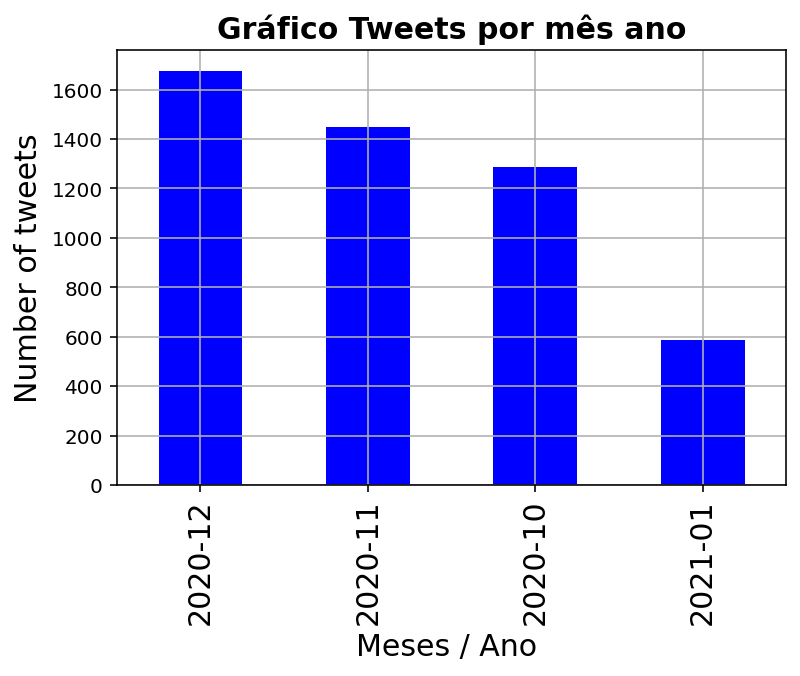

In [ ]:
import matplotlib.pyplot as plt
#Grafico de tweets acumulados por mês / ano


mes_ano_acumulado= df['mes_ano'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Meses / Ano ', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Gráfico Tweets por mês ano', fontsize=15, fontweight='bold')
plt.style.use('fivethirtyeight')
mes_ano_acumulado[:5].plot(ax=ax, kind='bar', color='blue')

#https://www.listendata.com/2019/06/matplotlib-tutorial-learn-plot-python.html
#https://pbpython.com/groupby-agg.html

In [ ]:
df.groupby('mes_ano', as_index=False).agg({"text": "sum"})

,mes_ano,text
0,2020-10,"estamos a 0 dias sem passar raiva com o earte, o recorde é de 0 diascom o earte agora eu tô tendo q fazer um monte de texto e os comentários são todos elogiando meu texto mas falando de algum erro de coisas do português kkSerá que eu tô vivendo ou apenas esperando o fim do EA..."
1,2020-11,Pontos negativos e positivos do earte — positivo: assisti aula dormindo \r\nponto negativo: todos https://t.co/yrJ98bM9i8@famoso_coca O cachorro morto representando a nossa morte patrocinada pelo earte e pela política brasileiraamanhã começa mais uma semana de earte força pr...
2,2020-12,@Tea_earte てぃさんあけましておめでとうございます~！🐮\r\n当たり前に呼び捨てされるくらいてぃさんと仲良くなるのが今年の目標です覚悟しててください@Tea_earte 今年もすきです！！！(早い)@Tea_earte あけおめですー!!!!!@Tea_earte てぃさんあけおめです！！！！\r\n今年もよろしくお願いしますねっ☺️@Tea_earte 楽しい一年にするぞー！@Tea_earte もちろんですとも!!!!!\r\n仲良くしてやってください!!!@Tea_earte あけましておめでとうございます！\r\nアモアスでし...
3,2021-01,@Tea_earte てぃさんおはようございますっ😆✨@Tea_earte てぃさぁぁあんんんん！！！！！GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURANS7D DU F https://t.co/HXvDu9tIY4@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃@Tea_earte バサッッ🦅@Tea_earte ティコロス...タベル🦅@Tea_earte ...


In [ ]:
df['mes_ano'].count()

KeyError: ignored

In [ ]:
#contar quantidade de informações do Dataframe
df.count()

# Total tweets
print ('Total tweets this period:', len(df.index), '\n')



Total tweets this period: 4998 



# 4.0 Analisando informações e agrupamento por data

In [ ]:
df.info()
topretweets = df.groupby('retweet_id').size().sort_values(ascending=False).reset_index()
topretweeted = df.groupby('retweet_user_screen_name').size().sort_values(ascending=False).reset_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4998 non-null   int64  
 1   tweet_url                     4998 non-null   object 
 2   created_at                    4998 non-null   object 
 3   parsed_created_at             4998 non-null   object 
 4   user_screen_name              4998 non-null   object 
 5   text                          4998 non-null   object 
 6   tweet_type                    4998 non-null   object 
 7   coordinates                   0 non-null      float64
 8   hashtags                      536 non-null    object 
 9   media                         385 non-null    object 
 10  urls                          290 non-null    object 
 11  favorite_count                4998 non-null   int64  
 12  in_reply_to_screen_name       1255 non-null   object 
 13  in_

KeyError: ignored

# 4.1 

In [ ]:

#import matplotlib.pyplot as plt
import seaborn as sns
popular_hashtags = sns.load_dataset("popular_hashtags")


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12498 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12490 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12467 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12499 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12468 missing from current font.

/usr/local/li

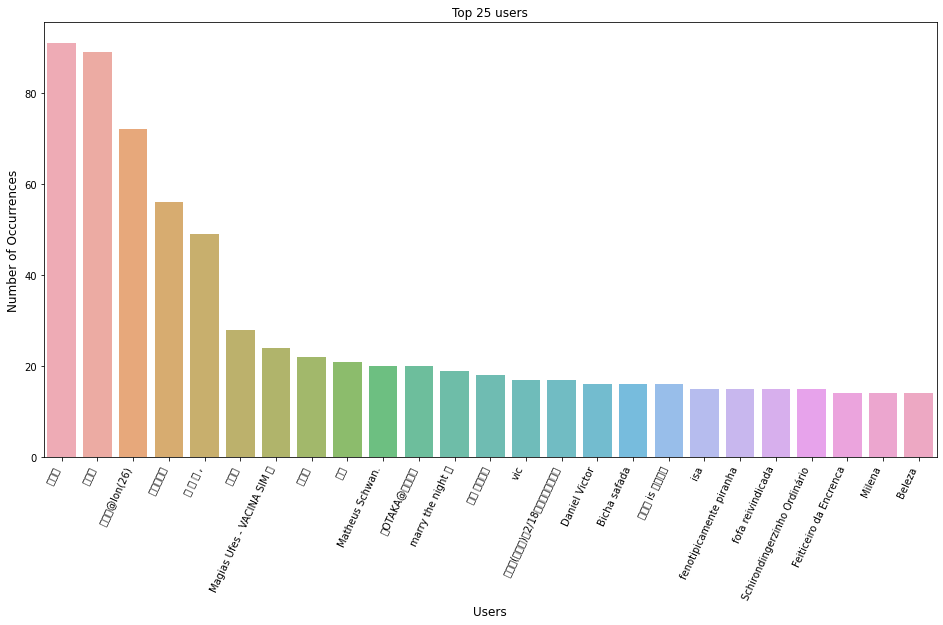

In [ ]:
# Top 25 users

#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

users_count  = df['user_name'].value_counts()
users_count = users_count[:25,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 25 users')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Users', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()



In [ ]:
import re
def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)   

df['hashtags'] = df.text.apply(find_hashtags)

In [ ]:
#pd.set_option(“min_rows”, 100)
df.head(500)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_new,hashtag
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,[],NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさんおはようございますっ😆✨,[]
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,[],NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさぁぁあんんんん！！！！！,[]
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,[],https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,[]
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,[],NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,[]
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,[],NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1345878733274669062,https://twitter.com/qdembz/status/134587873327...,Sun Jan 03 23:44:29 +0000 2021,2021-01-03 23:44:29+00:00,qdembz,@earte__ The only person I want in my head htt...,reply,NaN,[],https://pbs.twimg.com/media/Eq2Fk1dW8AA_-Xs.jpg,NaN,0,earte__,1.345798e+18,1.318266e+18,en,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1250518611527176192,Wed Apr 15 20:17:40 +0000 2020,False,wake up get my dicc succ😩😤,5334,22,246,0,NaN,semen demon,238,NaN,http://nigerianprince.co.uk,False,The only person I want in my head,[]
496,1345894767297757184,https://twitter.com/sptacula/status/1345894767...,Mon Jan 04 00:48:12 +0000 2021,2021-01-04 00:48:12+00:00,sptacula,22h da noite tô pensando nas matérias do earte...,original,NaN,[],NaN,NaN,0,NaN,NaN,NaN,pt,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",964333391515734021,Fri Feb 16 02:59:31 +0000 

# 4.2 extraçao hashtags

In [ ]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df

,hashtags
37,"[#EARTE, #ArquitecturaUSJ, #TallerdeproyectosU..."
105,[#OR]
106,[#OR]
109,[#OR]
120,[#OR]
...,...
4972,"[#OR, #ORBITUNION]"
4976,[#OR]
4986,[#earte]
4987,"[#OR, #ORBITUNION]"


In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [ ]:
type(flattened_hashtags_df)

pandas.core.frame.DataFrame

In [ ]:
flattened_hashtags_df

,hashtag
0,#EARTE
1,#ArquitecturaUSJ
2,#TallerdeproyectosUSJ
3,#jury
4,#OR
...,...
815,#earte
816,#OR
817,#ORBITUNION
818,#OR


In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list], columns=['hashtags'])

flattened_hashtags_df

,hashtags
0,#EARTE
1,#ArquitecturaUSJ
2,#TallerdeproyectosUSJ
3,#jury
4,#OR
...,...
815,#earte
816,#OR
817,#ORBITUNION
818,#OR


In [ ]:
# number of unique hashtags
flattened_hashtags_df['hashtags'].unique().size

59

In [ ]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtags').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)


                              

In [ ]:
popular_hashtags.tail

<bound method NDFrame.tail of                          hashtags  counts
0                             #OR     410
1                   #MeLiberaUfes      70
2                   #HappyJuneDay      64
3                          #EARTE      43
4                     #ORBITUNION      41
5                   #HappyTomoDay      32
6                          #earte      19
7          #boycottfranceproducts      12
8                   #HappyYugoDay      12
9                           #UFES       9
10                          #ufes       6
11                     #earteufes       5
12                #emprendimiento       5
13                   #videojuegos       5
14              #Recogidadefondos       4
15                          #espa       4
16                  #GuardiaCivil       4
17                      #hispanos       4
18                    #aragoneses       4
19                   #unsubscribe       4
20              #Bancodealimentos       4
21                   #Pilares2020       4
22  

In [ ]:
type(popular_hashtags.head(10))

pandas.core.frame.DataFrame

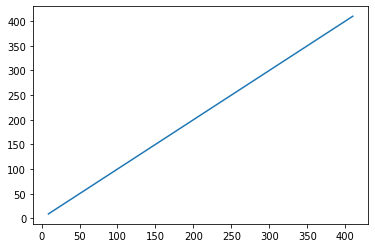

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x = popular_hashtags.hashtags.head(10)
y = x = popular_hashtags.counts.head(10)
plt.plot(x,y)

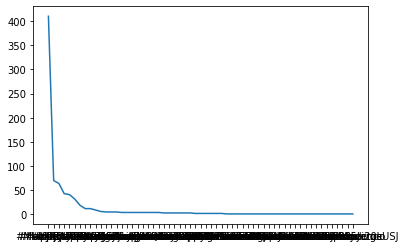

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.catplot(x="popular_hashtags", kind="counts", palette="ch:.25", data=popular_hashtags)
#plt.plot(popular_hashtags['hashtags.head(10)'], popular_hashtags['counts'])
plt.plot(popular_hashtags['hashtags'], popular_hashtags['counts'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



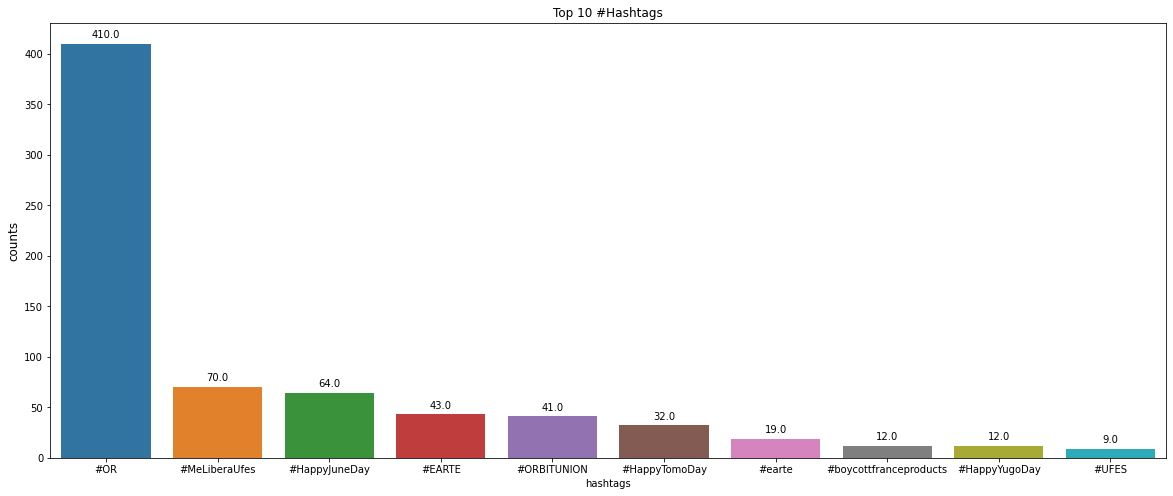

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
x = popular_hashtags.hashtags.head(10)
y = popular_hashtags.counts.head(10)
plt.title('Top 10 #Hashtags')
plt.ylabel('#Hashtags', fontsize=12)
splot= sns.barplot(x,y, data=popular_hashtags);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')



In [ ]:
x

0    410
1     70
2     64
3     43
4     41
5     32
6     19
7     12
8     12
9      9
Name: counts, dtype: int64

In [ ]:
popular_hashtags.columns 

Index(['hashtags', 'counts'], dtype='object')

In [ ]:
type(popular_hashtags)

pandas.core.frame.DataFrame

In [ ]:
popular_hashtags


,hashtags,counts
0,#OR,410
1,#MeLiberaUfes,70
2,#HappyJuneDay,64
3,#EARTE,43
4,#ORBITUNION,41
5,#HappyTomoDay,32
6,#earte,19
7,#boycottfranceproducts,12
8,#HappyYugoDay,12
9,#UFES,9


# 4.9 Popular hashtags

In [ ]:
popular_hashtags.head(10)

,hashtags,counts
0,#OR,410
1,#MeLiberaUfes,70
2,#HappyJuneDay,64
3,#EARTE,43
4,#ORBITUNION,41
5,#HappyTomoDay,32
6,#earte,19
7,#boycottfranceproducts,12
8,#HappyYugoDay,12
9,#UFES,9


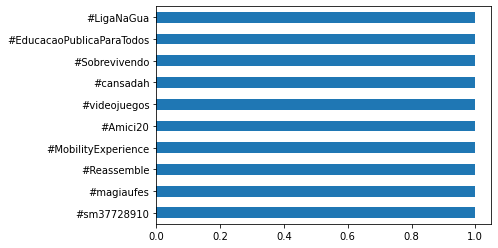

In [ ]:
popular_hashtags['hashtags'].value_counts()[:10].plot(kind='barh')


TypeError: ignored

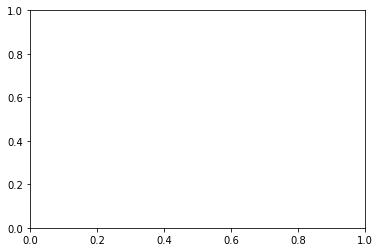

In [ ]:
plt.plot(popular_hashtags.head(10))

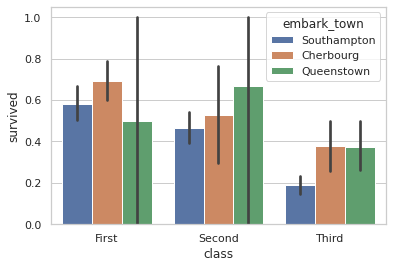

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic_dataset = sns.load_dataset("titanic")

sns.barplot(x = "class", y = "survived", hue = "embark_town", data = titanic_dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



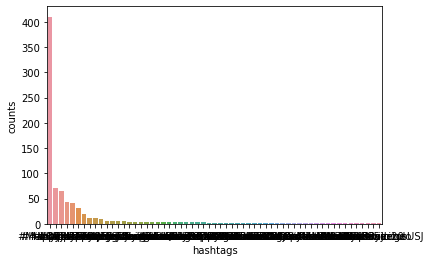

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot('hashtags', 'counts', data=popular_hashtags)
plt.show()

In [ ]:
# get the value counts for source column
#popular_hashtags[['hashtags','counts']]
popular_hashtags[['hashtags'].value_counts()
#popular_hashtags.index

SyntaxError: ignored

In [ ]:
# Gráfico hashtags
popular_hashtags.sort_values(['hashtags', 'counts'], ascending=False).groupby('item').head(10)
#cat_totals = popular_hashtags.groupby("hashtags")["counts"].sum().sort_values()
cat_totals
plt.figure(figsize=(15,8))
cat_totals.plot(kind="barh", fontsize=4)
#https://realpython.com/pandas-plot-python/

KeyError: ignored

In [ ]:
#popular_hashtags.sort_values(['hashtags', 'counts'], ascending=True).groupby('hashtags').head(10)
#popular_hashtags.sort_index(level=0).groupby('hashtags').head(10)
#popular_hashtags.groupby(['counts', 'hashtags']).size().head(10)
popular_hashtags.nlargest(10,['counts'])

,hashtags,counts
0,#OR,410
1,#MeLiberaUfes,70
2,#HappyJuneDay,64
3,#EARTE,43
4,#ORBITUNION,41
5,#HappyTomoDay,32
6,#earte,19
7,#boycottfranceproducts,12
8,#HappyYugoDay,12
9,#UFES,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



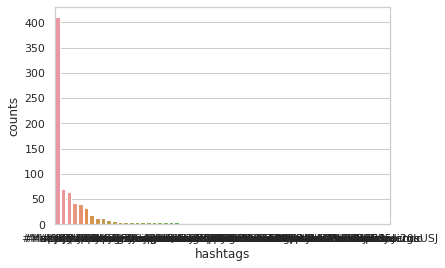

In [ ]:
sns.barplot('hashtags', 'counts', data=popular_hashtags)
plt.show()

TypeError: ignored

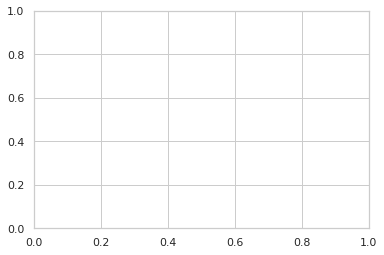

In [ ]:
import matplotlib.pyplot as plt
x = popular_hashtags.nlargest(10,['counts'])

#type(x)
#x.columns
#y

plt.plot(x)
plt.show()

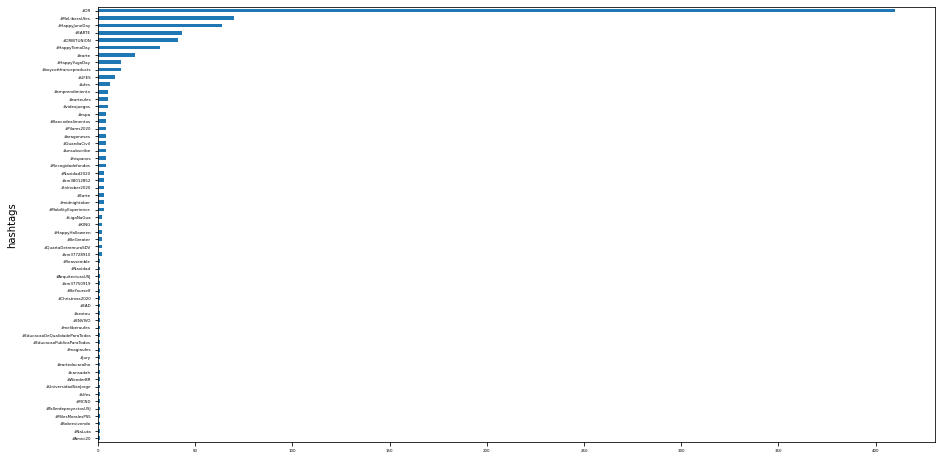

In [ ]:
# Gráfico hashtags
cat_totals = popular_hashtags.groupby("hashtags")["counts"].sum().sort_values()
cat_totals
plt.figure(figsize=(15,8))
cat_totals.plot(kind="barh", fontsize=4)
#https://realpython.com/pandas-plot-python/

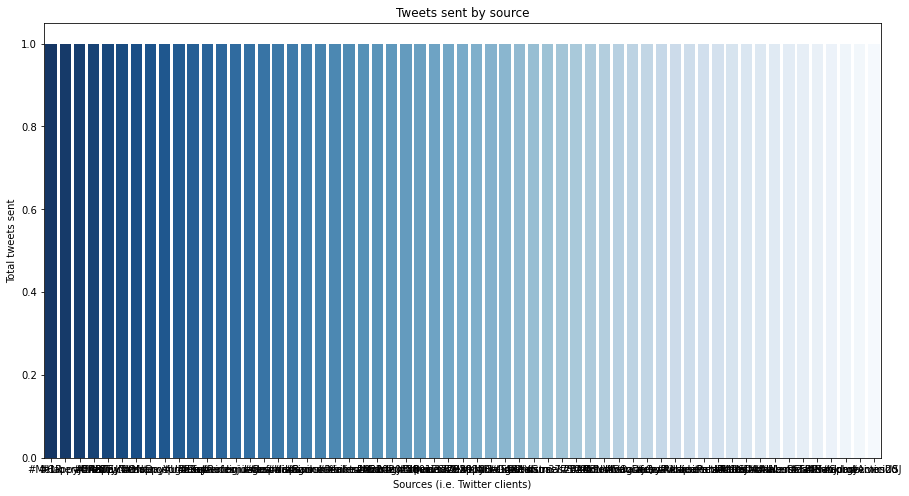

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the above data
# set the figure size
plt.figure(figsize=(15,8))

# create a countplot, ordered by count
sns.countplot(x='hashtags', data=popular_hashtags, palette = 'Blues_r' )
#sns.catplot(x="hashtags", kind="counts", palette="ch:.25", data=popular_hashtags)
# rotate the ticks for better readability
#plt.xticks(rotation=45, fontsize='11', horizontalalignment='right')

# set the labels and title
plt.xlabel('Sources (i.e. Twitter clients)')
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by source');

In [ ]:
popular_hashtags

['counts', 'hashtags']

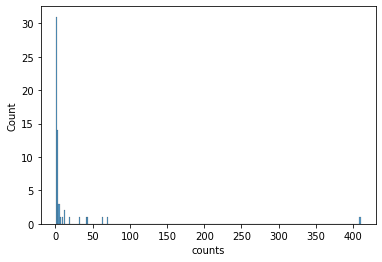

In [ ]:
import seaborn as sns
sns.histplot(popular_hashtags.counts) #, kde=True)
#sns.countplot(x='hashtags', data=popular_hashtags, palette = 'Blues_r' , order = df['hashtags'].value_counts().index)
plt.show()

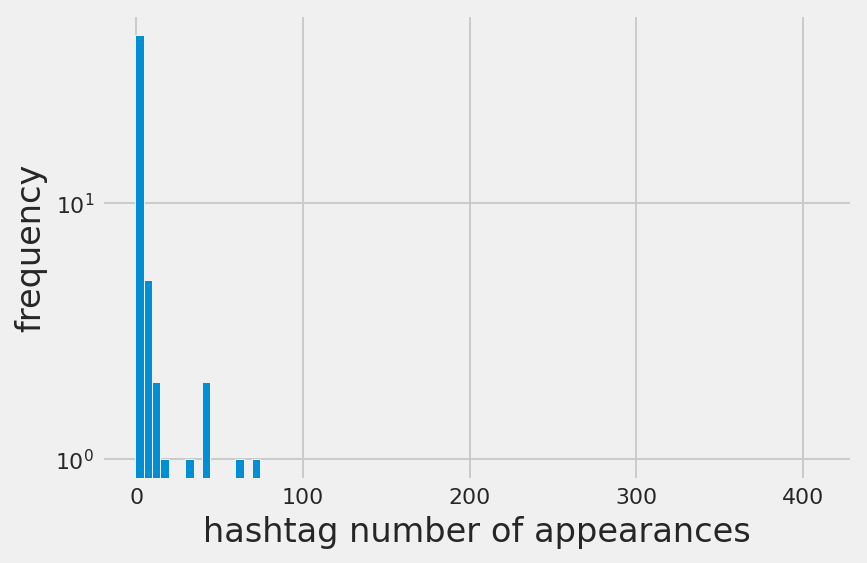

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtags']).size()\
                              .reset_index(name='counts')\
                              .counts
# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5 

# plot histogram of tweet counts
#plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

# 4.10 Grafico Tags

In [ ]:
popular_hashtags.info

NameError: ignored

In [ ]:
df.popular_hashtags = pd.DataFrame(popular_hashtags)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
df.popular_hashtags.columns
#type(df.popular_hashtags)

Index(['hashtags', 'counts'], dtype='object')

In [ ]:
df.popular_hashtags

,hashtags,counts
0,#OR,410
1,#MeLiberaUfes,70
2,#HappyJuneDay,64
3,#EARTE,43
4,#ORBITUNION,41
5,#HappyTomoDay,32
6,#earte,19
7,#boycottfranceproducts,12
8,#HappyYugoDay,12
9,#UFES,9


In [ ]:
!pip install seaborn

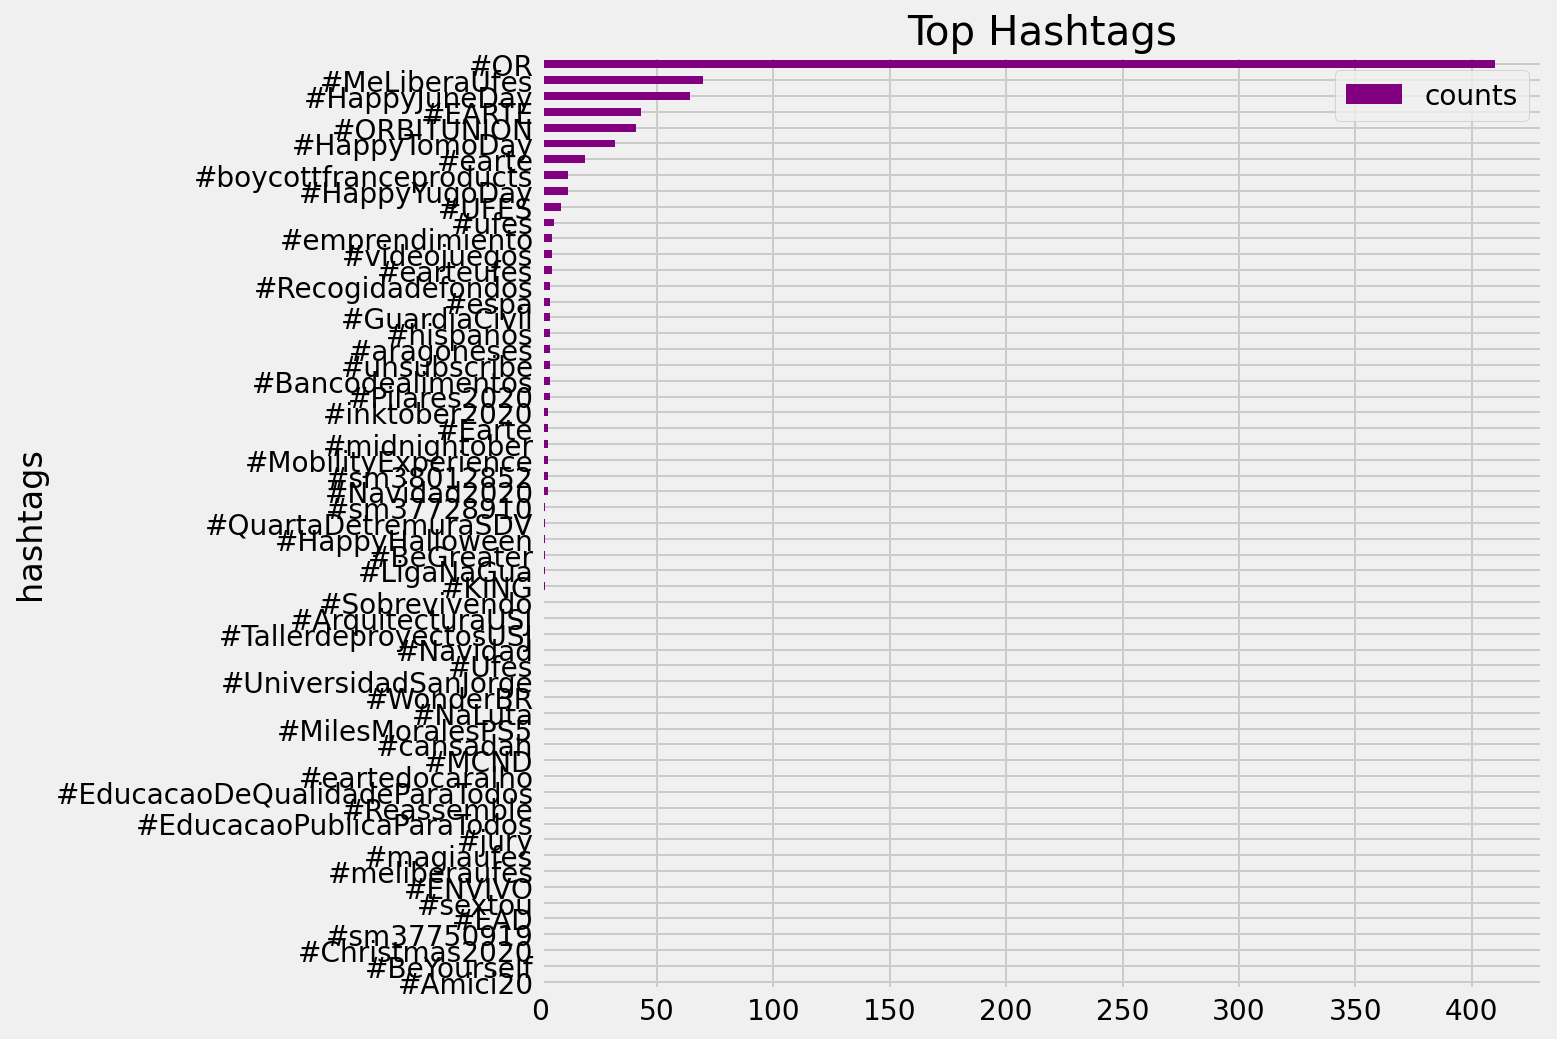

<Figure size 1872x1152 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
plt.figure(figsize=(26,16))
df.popular_hashtags.sort_values(by='counts').plot.barh(x='hashtags', y='counts', ax=ax, color="purple")
ax.set_title("Top Hashtags")
plt.show()

#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/

In [ ]:
print(df.popular_hashtags['hashtags'], ['counts'])

0                               #OR
1                     #MeLiberaUfes
2                     #HappyJuneDay
3                            #EARTE
4                       #ORBITUNION
5                     #HappyTomoDay
6                            #earte
7            #boycottfranceproducts
8                     #HappyYugoDay
9                             #UFES
10                            #ufes
11                       #earteufes
12                  #emprendimiento
13                     #videojuegos
14                #Recogidadefondos
15                            #espa
16                    #GuardiaCivil
17                        #hispanos
18                      #aragoneses
19                     #unsubscribe
20                #Bancodealimentos
21                     #Pilares2020
22                    #inktober2020
23                           #Earte
24                    #midnightober
25              #MobilityExperience
26                      #sm38012852
27                     #Navi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



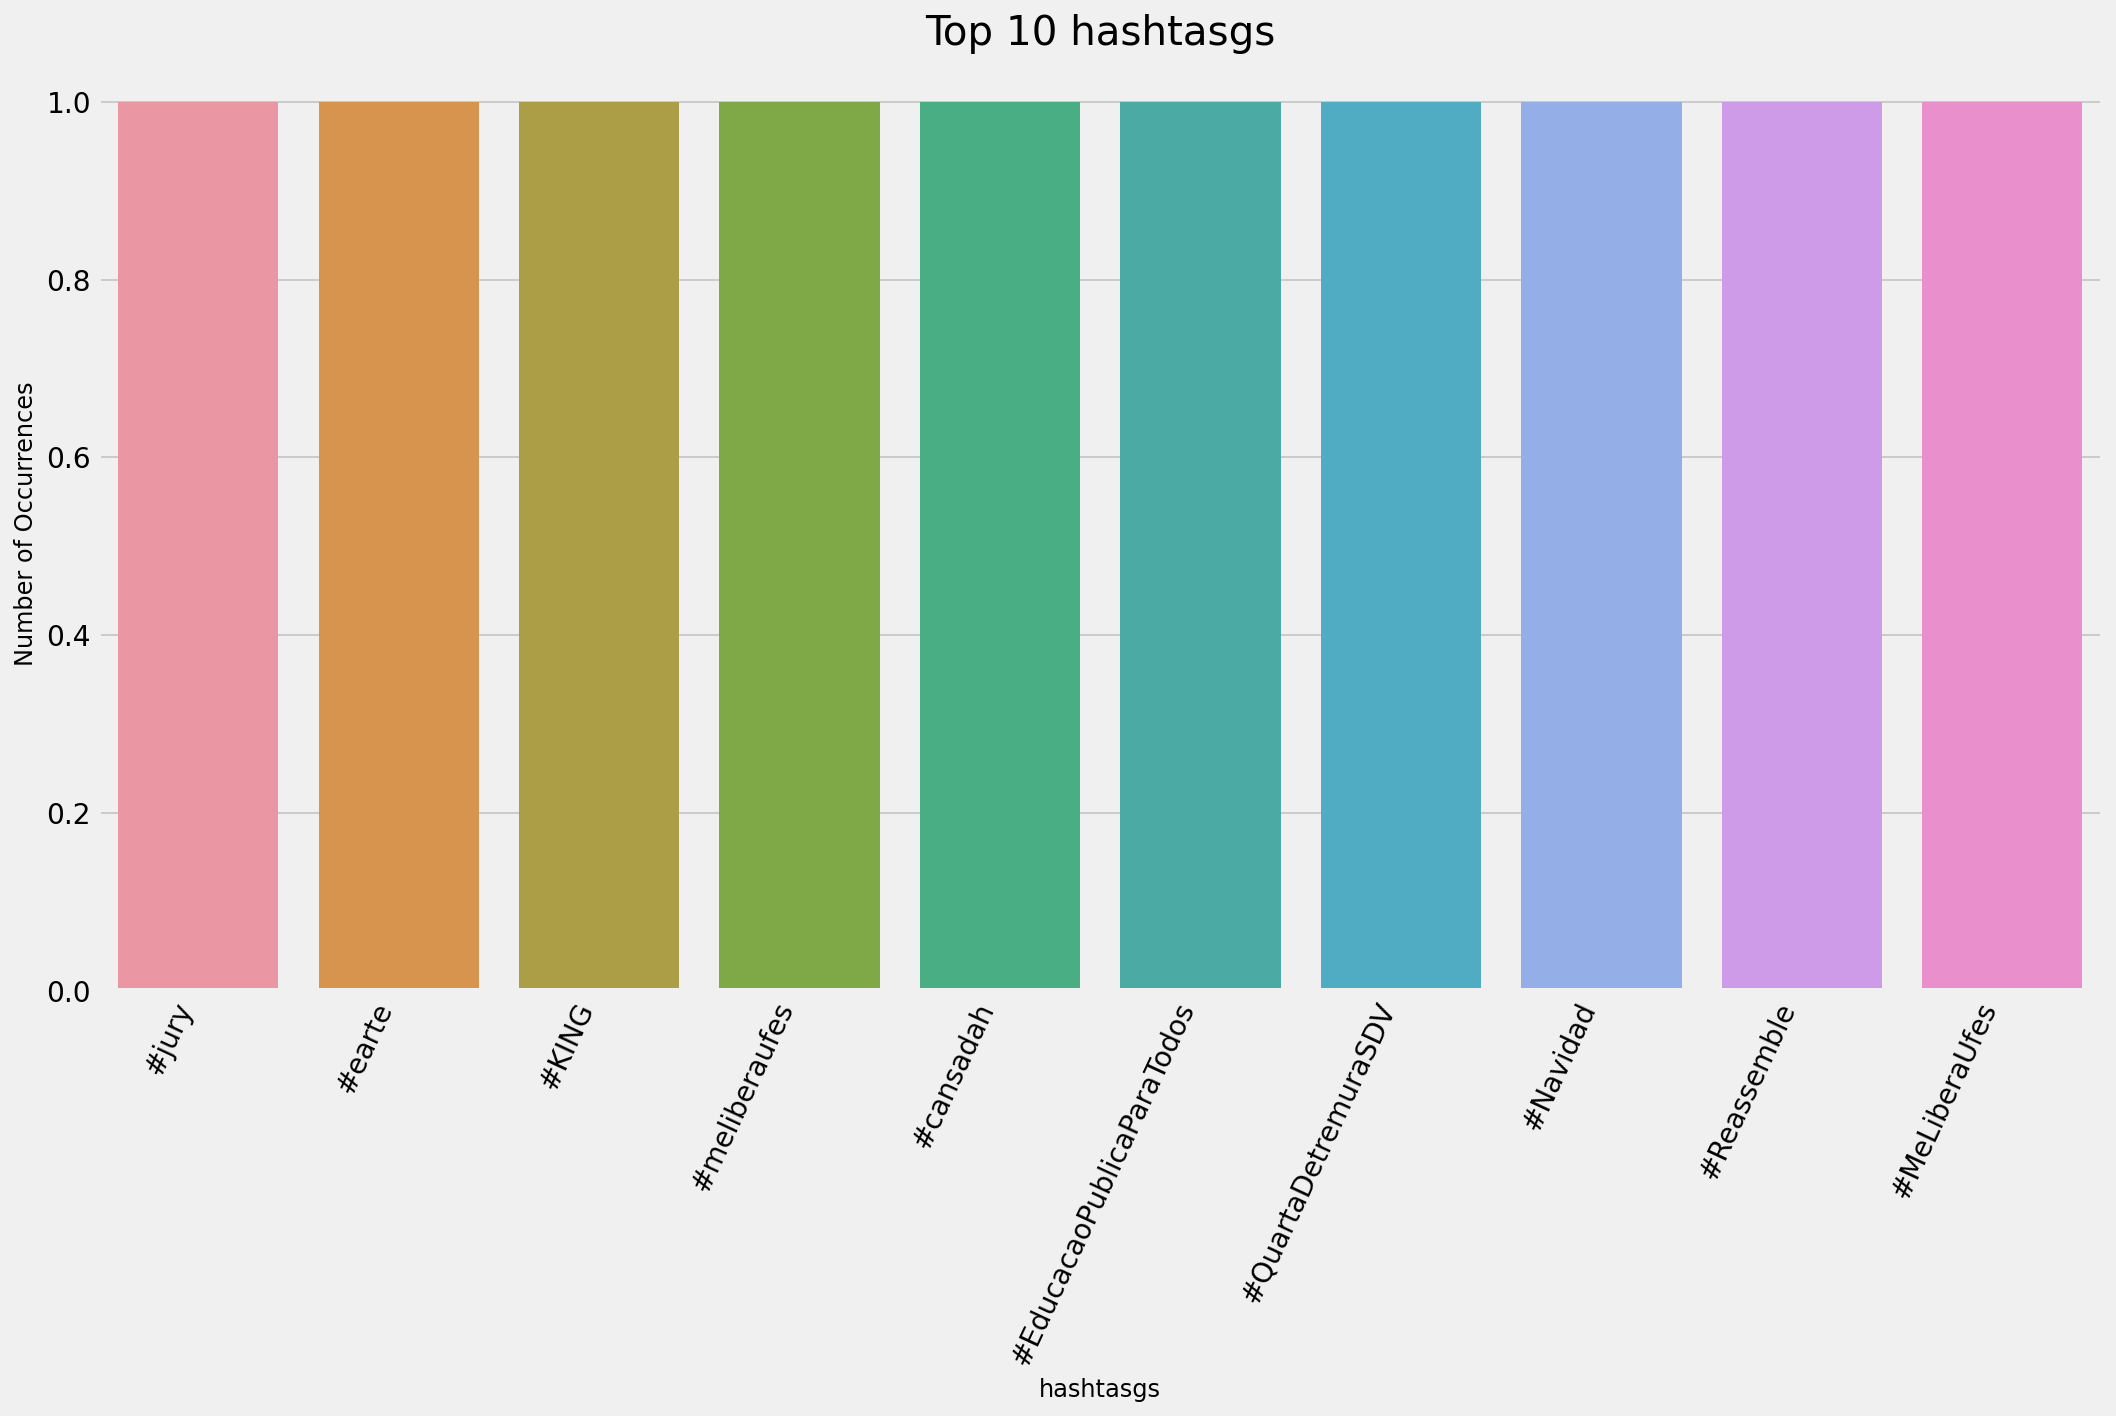

In [ ]:
# teste 

#import matplotlib.pyplot as plt
import seaborn as sns
users_count  = df.popular_hashtags['hashtags'].value_counts()
users_count = users_count[:10,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values)
plt.title('Top 10 hashtasgs')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hashtasgs', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()


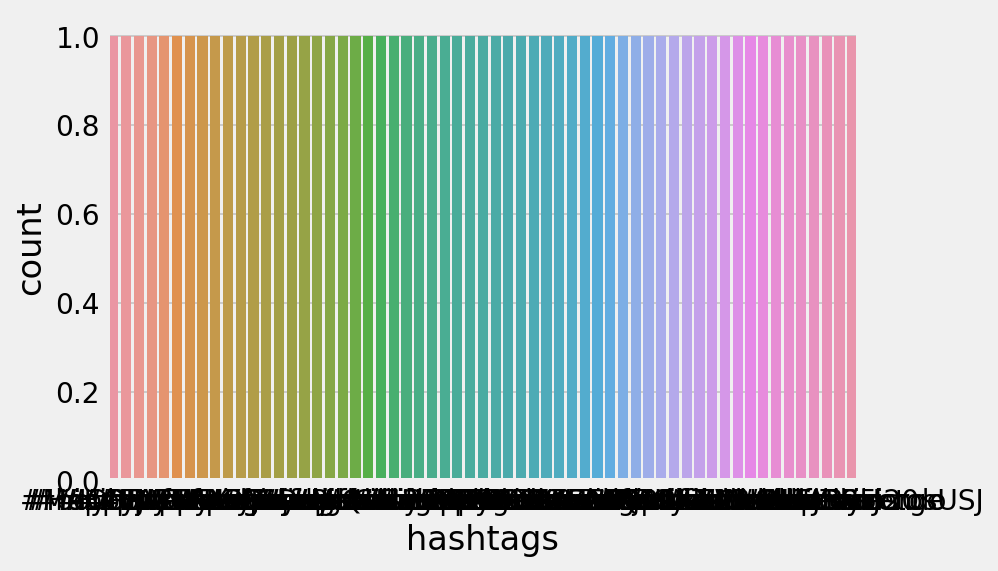

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot (x='hashtags', data=df.popular_hashtags)
plt.show()
#(df['df.popular_hashtags], bins = 10)

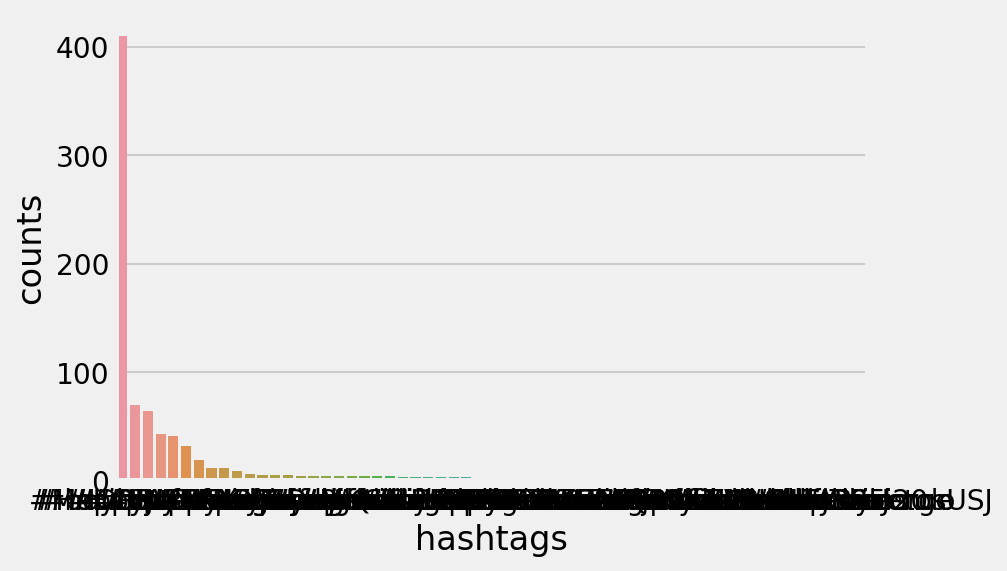

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

#sns.scatterplot(data=popular_hashtags, x="hashtags", y="counts")
ax = sns.barplot(x="hashtags", y="counts", data=popular_hashtags)

In [ ]:
word_list = [word for line in popular_hashtags for word in line.split()]
word_list[:5]

['counts', 'hashtags']

In [ ]:
word_list[:5]

['counts', 'hashtags']

In [ ]:
from collections import Counter
sns.set(style="darkgrid")
popular_hashtags = pd.DataFrame(hashtags)
popular_hashtags = ['counts', 'hashtags']
fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="frequency", x='word', ax = ax, data=popular_hashtags)


NameError: ignored

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
# Create a visualization


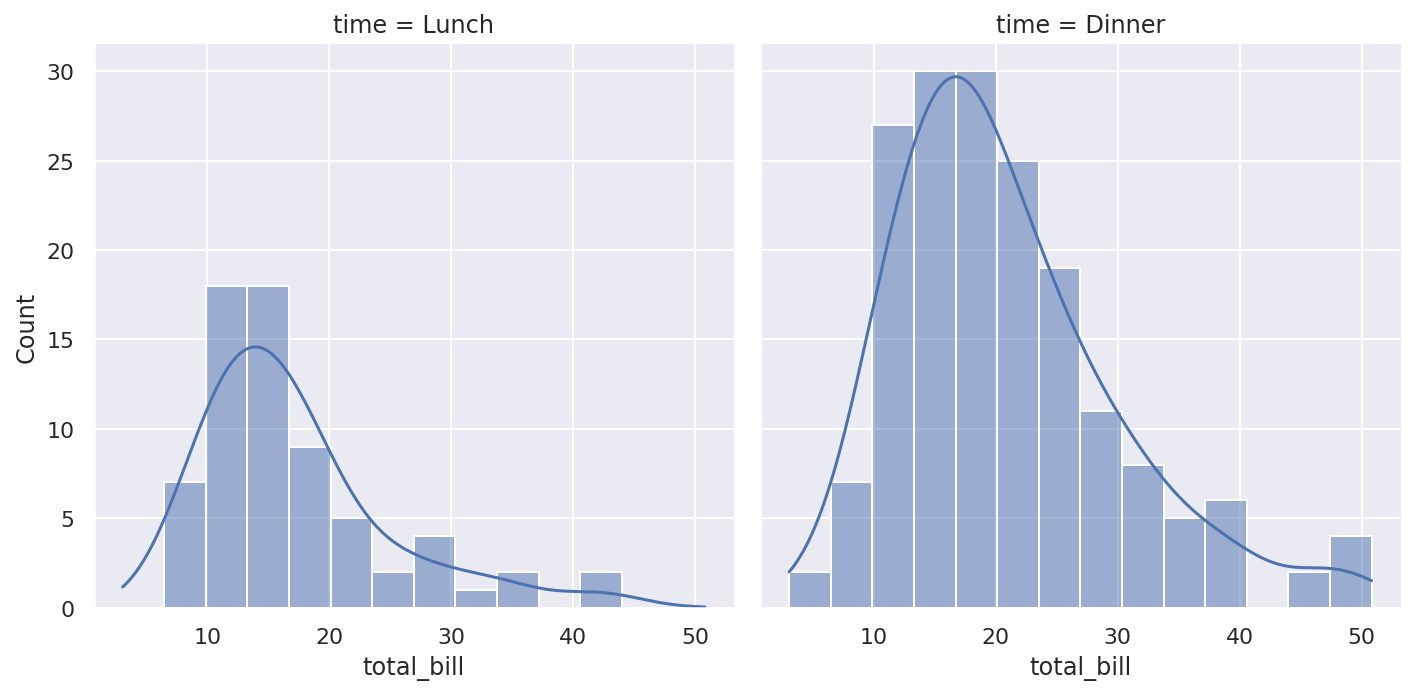

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


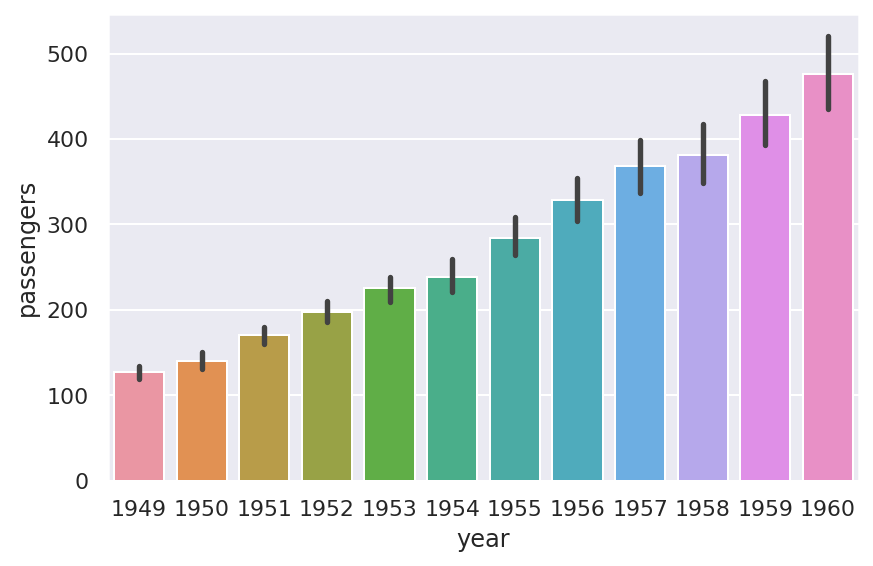

In [ ]:
sns.barplot(data = flights_data, x = "year", y = "passengers")

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = "hashtags", y = "counts", data = popular_hashtags)

AttributeError: ignored

In [ ]:
popular_hashtags

['counts', 'hashtags']

In [ ]:
from pandas import DataFrame
df3 = dataframe (popular_hashtags).transpose ()
df.columns ['hashtags', 'counts']

NameError: ignored

# Twitter Data Analysis - Sentiment Analysis

In [ ]:
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_new,hashtag
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさんおはようございますっ😆✨,[]
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,てぃさぁぁあんんんん！！！！！,[]
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,[]
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,[]
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃,[]


In [ ]:

#Gets all hashtags.
def get_hashtags(df):
    return [tag['text'] for tag in dftweet['entities']['hashtags']]

#https://gist.github.com/timothyrenner/dd487b9fd8081530509c 


In [ ]:
df.head

In [ ]:
#tratamento campo TEXT 
import re
# Cleaning the text by removing hastags, @'s, URL's.
def CleanTxt(text):
  text = re.sub(r"@(\w+)", ' ', text) # This wil remove any @ mentions
  text = re.sub('@[^\s]+','',text) # This will remove any hashtags (#)
  text = re.sub('https?:\/\/\S+', '', text) # This will remove any URl's
  text = re.sub('RT[\s]+', '', text) # This will remove any RT mentions

  return text

# Cleaning the text
df['text_limpo'] = df['text'].apply(CleanTxt)

# Showing the cleaned text
df['text_limpo']

#df['text','text_limpo']




#https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
#https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082
#https://dev.to/nicfoxds/how-to-analyse-clean-text-data-in-python-2hb9
#https://twitter-data-analysis.blogspot.com/2020/08/twitter-data-analysis-part-3-sentiment.html

0                                        てぃさんおはようございますっ😆✨
1                                         てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3                          てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4              喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃
                              ...                        
4993                                Eu no EARTE kkkkkkkk 
4994        earte me fazendo passar raiva em pleno sábado
4995      SIM! as atividades do earte que aguardem eu ...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text_limpo, Length: 4998, dtype: object

In [ ]:
#comparando dados campo TEXT e TEXT_LIMPO
df[['id','text','text_limpo']]

,id,text,text_limpo
0,1348123015066775554,@Tea_earte てぃさんおはようございますっ😆✨,てぃさんおはようございますっ😆✨
1,1348125535495340033,@Tea_earte てぃさぁぁあんんんん！！！！！,てぃさぁぁあんんんん！！！！！
2,1348145276914200576,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3,1348184655237844992,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4,1348187077905563649,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃
...,...,...,...
4993,1315506913627561985,Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh,Eu no EARTE kkkkkkkk
4994,1315074239360389121,earte me fazendo passar raiva em pleno sábado,earte me fazendo passar raiva em pleno sábado
4995,1314955335296221184,@Lugusfe SIM! as atividades do earte que aguar...,SIM! as atividades do earte que aguardem eu ...
4996,1316051961146478592,em completo desespero e desânimo com com earte,em completo desespero e desânimo com com earte


In [ ]:
# Print the columns of the dataframe
print(df.columns)

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'text', 'tweet_type', 'coordinates', 'hashtags',
       'media', 'urls', 'favorite_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'text_new', 'hashtag'],
      dtype='object')


In [ ]:
#Filtrando dados TEA
df.user_screen_name 

In [ ]:
# Get all names 
for col_name in df.columns: 
    print(col_name)

id
tweet_url
created_at
parsed_created_at
user_screen_name
text
tweet_type
coordinates
hashtags
media
urls
favorite_count
in_reply_to_screen_name
in_reply_to_status_id
in_reply_to_user_id
lang
place
possibly_sensitive
retweet_count
retweet_or_quote_id
retweet_or_quote_screen_name
retweet_or_quote_user_id
source
user_id
user_created_at
user_default_profile_image
user_description
user_favourites_count
user_followers_count
user_friends_count
user_listed_count
user_location
user_name
user_statuses_count
user_time_zone
user_urls
user_verified
text_new
hashtag


In [ ]:
df.values.tolist()

[[1348123015066775554,
  'https://twitter.com/b2Gr8/status/1348123015066775554',
  'Sun Jan 10 04:22:28 +0000 2021',
  '2021-01-10 04:22:28+00:00',
  'b2Gr8',
  '@Tea_earte てぃさんおはようございますっ😆✨',
  'reply',
  nan,
  nan,
  nan,
  nan,
  1,
  'Tea_earte',
  1.3480923622458245e+18,
  1.302151645543854e+18,
  'ja',
  nan,
  nan,
  0,
  nan,
  nan,
  nan,
  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  1264309021,
  'Wed Mar 13 12:05:21 +0000 2013',
  False,
  '声真似主さん好き！/サブ(@b_2G_r8)',
  107653,
  710,
  488,
  7,
  nan,
  'ビゴリ',
  118678,
  nan,
  nan,
  False,
  ' てぃさんおはようございますっ😆✨',
  []],
 [1348125535495340033,
  'https://twitter.com/b2Gr8/status/1348125535495340033',
  'Sun Jan 10 04:32:29 +0000 2021',
  '2021-01-10 04:32:29+00:00',
  'b2Gr8',
  '@Tea_earte てぃさぁぁあんんんん！！！！！',
  'reply',
  nan,
  nan,
  nan,
  nan,
  1,
  'Tea_earte',
  1.3481239067128955e+18,
  1.302151645543854e+18,
  'ja',
  nan,
  nan,
  0,
  nan,
  nan,
  nan,
  '<a href="http:/

In [ ]:
print(df['text']) # imprimir somente uma coluna do dataframe

0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object


In [ ]:
df[['id','created_at','text']]

,id,created_at,text
0,1348123015066775554,2021-01-10 04:22:28+00:00,@Tea_earte てぃさんおはようございますっ😆✨
1,1348125535495340033,2021-01-10 04:32:29+00:00,@Tea_earte てぃさぁぁあんんんん！！！！！
2,1348145276914200576,2021-01-10 05:50:56+00:00,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3,1348184655237844992,2021-01-10 08:27:24+00:00,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4,1348187077905563649,2021-01-10 08:37:02+00:00,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
...,...,...,...
4993,1315506913627561985,2020-10-12 04:17:43+00:00,Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994,1315074239360389121,2020-10-10 23:38:26+00:00,earte me fazendo passar raiva em pleno sábado
4995,1314955335296221184,2020-10-10 15:45:57+00:00,@Lugusfe SIM! as atividades do earte que aguar...
4996,1316051961146478592,2020-10-13 16:23:33+00:00,em completo desespero e desânimo com com earte


In [ ]:

#Lets take a look at the users who are posting these tweets:
print("There are {} different users".format(df['user_name'].nunique()))

#https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920

There are 1834 different users


In [ ]:


#Plot these results
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize = 18)
plt.ylabel('Nº of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for the most active users', fontsize = 20)
plt.savefig('Tweets_of_active_users.jpg')
plt.show()
#com erro 
#https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920

NameError: ignored

<Figure size 1080x1080 with 0 Axes>

In [ ]:
df1 = pd.DataFrame(df)
df['created_at'] = pd.to_datetime(df['created_at']) # convert to datetime data type
df.sort_values(by='created_at');
df1.created_at



0      2021-01-10 04:22:28+00:00
1      2021-01-10 04:32:29+00:00
2      2021-01-10 05:50:56+00:00
3      2021-01-10 08:27:24+00:00
4      2021-01-10 08:37:02+00:00
                  ...           
4993   2020-10-12 04:17:43+00:00
4994   2020-10-10 23:38:26+00:00
4995   2020-10-10 15:45:57+00:00
4996   2020-10-13 16:23:33+00:00
4997   2020-10-13 00:30:49+00:00
Name: created_at, Length: 4998, dtype: datetime64[ns, UTC]

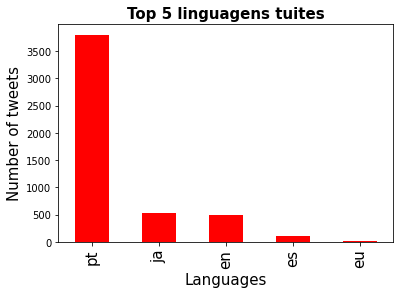

In [ ]:
#top languages

tweets_by_lang = df['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 linguagens tuites', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')



In [ ]:
df.head() 

In [ ]:
def extract_link(tex):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

df.text

0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


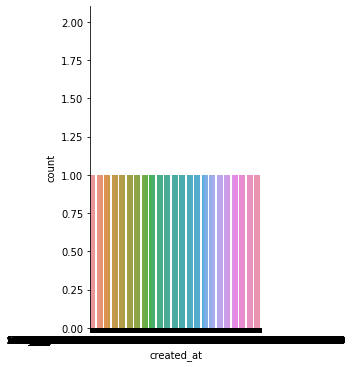

In [ ]:
#grafico 
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

sns.factorplot('created_at', data=df, kind='count')





In [ ]:
#informações do dataframe
#df.info() 

# Número de linhas da coluna ‘Text’:
df.Text.count()

# Removendo os valores duplicados:
df.drop_duplicates(['Text'], inplace=True)

#https://minerandodados.com.br/analise-de-sentimentos-utilizando-dados-do-twitter/

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import json

import numpy as np 
import pandas as pd 
from time import time
import re
import string
import os
#import emoji
import collections

st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['que','de','da', 'para', 'https','CO','RT','na','ao','os', 'em','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])


wc = WordCloud(height=600,repeat=False,width=1400,max_words=100,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df['text_limpo'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud Earte')
plt.axis('off')
plt.show()

#https://www.kaggle.com/overload10/twitter-dataset-eda referencia

KeyError: ignored

In [ ]:
# Estatísticas básicas
# Verificar mínimos e máximos para garantir se estão dentro dos limites esperados
# Verificar intervalo de variação da medida
# Verificar possíveis outliers
df.describe()

# Verificar tipos de dados
df.dtypes


# Verificar nulos
df.info()


# Verificar nulos
pandas.options.mode.use_inf_as_na = True
df.isnull().sum()

#ref https://www.kaggle.com/educfrio/an-lise-explorat-ria-de-dados 
# plotando dados: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            4998 non-null   int64              
 1   tweet_url                     4998 non-null   object             
 2   created_at                    4998 non-null   datetime64[ns, UTC]
 3   parsed_created_at             4998 non-null   object             
 4   user_screen_name              4998 non-null   object             
 5   text                          4998 non-null   object             
 6   tweet_type                    4998 non-null   object             
 7   coordinates                   0 non-null      float64            
 8   hashtags                      536 non-null    object             
 9   media                         385 non-null    object             
 10  urls                          290 no

NameError: ignored

In [ ]:
#Let’s see if there are any null values present in our dataset:
df.isnull().sum()

id                                 0
tweet_url                          0
created_at                         0
parsed_created_at                  0
user_screen_name                   0
text                               0
tweet_type                         0
coordinates                     4998
hashtags                        4462
media                           4613
urls                            4708
favorite_count                     0
in_reply_to_screen_name         3743
in_reply_to_status_id           3750
in_reply_to_user_id             3743
lang                               0
place                           4910
possibly_sensitive              4329
retweet_count                      0
retweet_or_quote_id             3395
retweet_or_quote_screen_name    3395
retweet_or_quote_user_id        3395
source                             1
user_id                            0
user_created_at                    0
user_default_profile_image         0
user_description                 381
u

**## Analise de dados**



In [ ]:
for index,text in enumerate(df['text']):
  print('Tweet %d:\n'%(index+1),text)

In [ ]:
#teste sentimento 
#from textblob import TextBlob

#iterar imprimindo todos tweets
for i in df.Tweet_text:
    print(df.Tweet_text)


  
import pandas as pd 
from textblob import TextBlob
df=pd.read_csv(r'/content/sample_data/tweet_activity_metrics_TheCoolFanBoi_20181208_20190105_en.csv')


#comment_words=' '
#stopwords=set(STOPWORDS)
print('Tweet   |     Polarity     |     Subjectivity')
for val in df.Tweet_text:
    sentiments=TextBlob(val)
    print('---------------')
    print(val,end='')
    print(' ',end='')
    print(sentiments.polarity,end='')
    print(' |  ',end='')
    print(sentiments.subjectivity)

#Codigo com erro; Corrigir

AttributeError: ignored

In [ ]:
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,Twitter for Android,1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False


In [ ]:
#lista de 20 top - PALAVRAS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=['earte','de','que','do', 'co','https','eu','no', 'pra','com', 'não', 'da', 'me'])
count_matrix = cv.fit_transform(df.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["TOP_WORD"])
word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("count", ascending = False).reset_index(drop = True)

word_count[:10]
#FUNCIONA 
#REFERENCIA: https://github.com/vhnegrisoli/analise-exploratoria-dados-python/blob/master/01%20-%20MongoDB%20e%20NoSQL%20com%20Python%2C%20Pandas%2C%20Scikit%20Learn%20e%20API%20Twitter.ipynb




,TOP_WORD,count
0,tea_earte,496
1,mais,493
2,2020,485
3,em,465
4,um,449
5,orβit,441
6,esse,411
7,uma,379
8,se,338
9,só,337


In [ ]:

# calculate number of characters in a tweet and save as new column
df['tweet_length']  = np.array([len(tweet) for tweet in df['text']])

print('Average number of characters per tweet:', df['tweet_length'].mean())
print('Average number of characters per reply:', df['tweet_length'][df['in_reply_to_status_id'] != 0].mean())
print('Average number of characters per retweet:', df['tweet_length'][df['retweeted_status_id'] != 0].mean())
print('Average number of characters per mention:', df['tweet_length'][df['mention_to_user_id'] != 0].mean())

#corrigir erro  retweet e mention
#https://www.kaggle.com/leonardoassis/portuguese-tweets-nltk-and-sklearn

Average number of characters per tweet: 89.96458583433373
Average number of characters per reply: 89.96458583433373


KeyError: ignored

text data analysis

In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    # remove special characters, links from tweets
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    # predict the sentiment of a tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# create a new column with the result of the sentiment analysis
df['sentiment'] = np.array([analize_sentiment(tweet) for tweet in df['text']])

# construct lists with classified tweets
pos_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] < 0]

# print percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

#verificar analise dos percentuais 

Percentage of positive tweets: 7.883153261304522%
Percentage of neutral tweets: 91.09643857543017%
Percentage of negative tweets: 1.0204081632653061%


time series analysis

In [ ]:
df.head()

In [ ]:
df_time = df.copy()

# set the timestamp column as the index and delete the column
df_time.index = df_time['created_at']
del df_time['created_at']

df_time.head()

In [ ]:
df.head()

In [ ]:
print('Total tweets in 2020:', df_time['2020']['created_at'].count())
#print('Total replies in 2020:', (df_time!=0)['2020']['in_reply_to_status_id'].sum()) # zeros need to be excluded

KeyError: ignored

In [ ]:
from textblob import TextBlob

# perform sentiment analysis on each tweet
# -1 < polarity < 1 (negativity vs positivity (sentiment))
# 0 < subjectivity < 1 (factual vs opinion)
for text in df:
    print(df.text)
    analysis = TextBlob(df.text)
    print(analysis.sentiment)
    print("----------")

#    Deu erro. retomar https://ugoproto.github.io/ugo_py_doc/


0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object


TypeError: ignored

In [ ]:
# Frequecy word
#Create List of Lower Case Words from Tweets

from collections import Counter

for item in df[text]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()




TypeError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in df['text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

,Common_words,count
1,e,38861
2,a,35424
3,o,27254
4,r,20401
5,t,19712
6,s,19319
7,i,15884
8,n,14076
9,d,12658
10,u,11655


In [ ]:
# most common words in twitter dataset

# Machine Learning imports
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
#from nltk.stem.wordnet import WordNetLemmatizerLoad #training dataset to Pandas and preview the top rows.
import matplotlib.pyplot as plt

all_words = []
for line in list(df['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Está funcionando. Falta inserir as stopWord
# https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



KeyError: ignored

In [ ]:
from collections import Counter

for item in df['text']:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10, "\n")

NameError: ignored

In [ ]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)
#https://ourcodingclub.github.io/tutorials/topic-modelling-python/

KeyError: ignored

In [ ]:
# Get the data
import matplotlib.pyplot as plt

tweet_count = len(df)
favorite_count = df['favorite_count'].sum()
retweet_count = df['retweet_count'].sum()

# Print it out
print('Number of tweets: ' + str(tweet_count))
print('Total number of likes: ' + str(favorite_count))
print('Total number of retweets: '+ str(retweet_count))
# Draw a nice plot of the likes and retweets
df.plot.bar(subplots=True, figsize=(10,6),y=
   ['favorite_count','retweet_count'])
plt.show()

KeyError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in df['text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

,Common_words,count
1,e,38861
2,a,35424
3,o,27254
4,r,20401
5,t,19712
6,s,19319
7,i,15884
8,n,14076
9,d,12658
10,u,11655


In [ ]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10]
[u'de', u'a', u'o', u'que', u'e', u'do', u'da', u'em', u'um', u'para']

len(stopwords)
203

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


203

In [ ]:
# Inspecting the distribution of numerical values
df.describe()

,count
count,19.000000
mean,14487.473684
std,10246.493299
min,4612.000000
25%,6270.000000
50%,11655.000000
75%,19515.500000
max,38861.000000


In [ ]:
# Generating Word Frequency
#Let's first generate a frequency table of all the words present in all the tweets combined.

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(text.str)
#https://github.com/shivamsingh96/Natural_Language_Processing/blob/master/Exploring%20Text%20Data.ipynb


AttributeError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Instanciando o objeto
vectorizer = TfidfVectorizer()
#construindo o vetorizador dos dados
vectorizer.fit(df['text']) 

print(vectorizer.vocabulary_)

print(vectorizer.idf_)



KeyError: ignored

Codigos que poderão ser implementados para melhorar esta analise ou futuras**

nRowsRead = 1000 # specify 'None' if want to read whole file
Tweets.csv has 14640 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/Tweets.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

 importar dataset com encoding 
full_df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', header = None, names = columns,  encoding='latin-1')

https://www.kaggle.com/parthsharma5795/comprehensive-twitter-airline-sentiment-analysis 
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


f.rename(columns={'tfr': 'TFR'}) #renomear coluna



*   Item da lista

*   Item da lista
*   Item da lista


*   Item da lista



# Referências consultadas



https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/

https://necromuralist.github.io/Neurotic-Networking/posts/nlp/twitter-word-frequencies/

https://marcobonzanini.com/2015/03/17/mining-twitter-data-with-python-part-3-term-frequencies/

https://advertools.readthedocs.io/en/master/advertools.word_frequency.html

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

https://minerandodados.com.br/analise-de-sentimentos-twitter-como-fazer/base-dados-scripts https://www.oreilly.com/library/view/mining-the-social/9781491973547/ch01.html
https://dev.to/mchdax/coletando-dados-do-twitter-com-python-1c7k
https://www.kaggle.com/amar09/sentiment-analysis-on-scrapped-tweets  LER

https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp 

https://www.kaggle.com/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model muito bom

https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb

